<a href="https://colab.research.google.com/github/besart951/mLL/blob/main/Kopie_von_L06_SVM_Part2_LAB_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report


%config InlineBackend.figure_formats = ['svg']

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cmap= mpl.colors.ListedColormap(['red', 'black', 'blue'])

In order to plot the decision boundary and margins we will used the `DecisionBoundaryDisplay.from_estimator` from `sklearn` and wrap it into a function for reuse:

In [2]:
def plot_svc_decision_function(model, X, y, ax):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap)

    DecisionBoundaryDisplay.from_estimator(
        estimator=model, X=X,ax=ax,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["grey", "black", "grey"],
        linestyles=["--", "-", "--"],
    )

    # indicate the support vectors
    ax.scatter(X[model.support_][:, 0], X[model.support_][:, 1],
               facecolors='none', edgecolors='black', s=100)

    ax.set_xlabel(r'$x_1$', fontsize=16)
    ax.set_ylabel(r'$x_2$', fontsize=16)

# TASK 1. SVM (2 Points): Soft Margin Classifier


Let's work on the same artificial data with two classes from part 1.

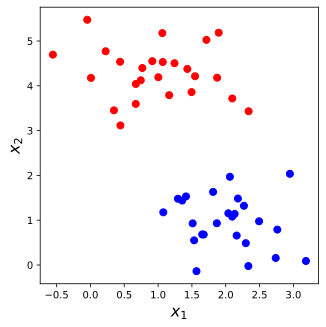

In [3]:
X, y = datasets.make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

_, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
ax.set_xlabel(r'$x_1$', fontsize=16)
ax.set_ylabel(r'$x_2$', fontsize=16)
plt.show()

In [4]:
model = svm.SVC(kernel='linear', C=0.1) # initialize the model
model.fit(X, y) # fit the model = learn the decision boundaries

SVC(C=0.1, kernel='linear')

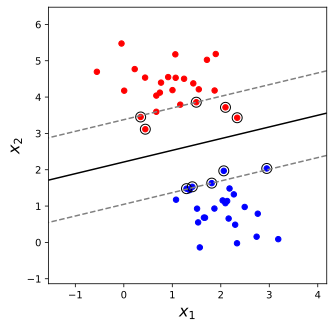

In [5]:
_, ax = plt.subplots(figsize=(5, 5))

plot_svc_decision_function(model, X, y, ax)

plt.show()

In the plot you see a solid and 2 dashed lines.

The solid line shows the decision boundary, meaning points on one side will be assigned to the blue class and on the other side to the red class. In this case all
data points lie on the correct side of the decision boundary, meaning our classifier has successfully learned to separate the classes.

The dashed lines visualize the margin of the SVM classifier. You can see that a
few points lie inside the margin. This is because, in practice, we use a soft-margin implementation for SVM. This means that we allow data points to be inside the margin, or even on the wrong side of the boundary, but during training we "punish" these points.

In the next excercise we will investigate the effect of the `C` parameter of. This
parameter controls how much we "punish" points inside (or on the wrong side) of the margin.

### Regularization
For each value `C` given in the code fragment below create an instance of SVC and set its parameter C accordingly. Train the model on the data `X` from the cells above. Plot the decision boundary using `plot_svc_decision_function(model, X, y, ax)`. Observe the effect from the plots and discuss with your colleagues whether it is in line with your expectation.



TypeError: Ellipsis is not an estimator instance.

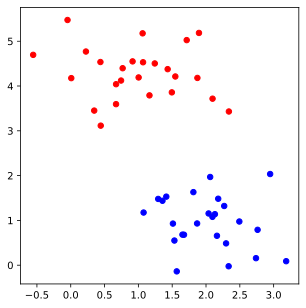

In [6]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # create an instance of SVC and set its parameter C
    # call its .fit method to train it on X and y

    model = ...

    _, ax = plt.subplots(figsize=(5, 5))
    plot_svc_decision_function(model, X, y, ax)
    ax.set_title(f"C={c}")
    plt.show()

### We add a new datapoint

We will now add a new red data point, that lies very close to the cluster of blue points.

In real world datasets, we run into this situation all the time. One reason can be that some data points really do look very similar but belong to different classes (e.g. imagine distinguishing a crocodile from an alligator). Another reason could be that the data point would really belong to the other (blue) class but has been annotated badly.

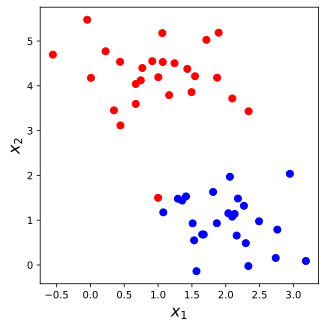

In [7]:
X2 = np.append(X, [[1., 1.5]], axis=0)
y2 = np.append(y, [0], axis=0)

_, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap=cmap)
ax.set_xlabel(r'$x_1$', fontsize=16)
ax.set_ylabel(r'$x_2$', fontsize=16)
plt.show()

Rerun the examle from above, i.e. train a linear `SVC` with different values of `C` and see what changes.

Pay particular attention to how the new data point changes the outcome.

TypeError: plot_svc_decision_function() missing 2 required positional arguments: 'y' and 'ax'

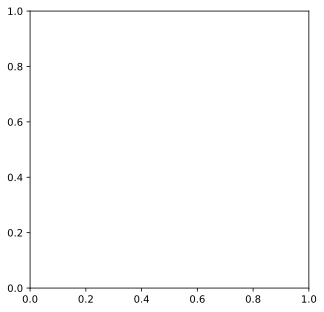

In [8]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # create an instance of LinearSVC and set its parameter C
    # call its .fit method to train it on X2 and y2

    model = ...

    _, ax = plt.subplots(figsize=(5, 5))
    plot_svc_decision_function(model, ...)
    ax.set_title(f"C={c}")
    plt.show()



Based on the experiments in **task 1** above, which value for `C` would you choose for the new data, and **why**?  


# Task 2. SVM Kernel Trick (6 points)
In this task we will investigate the case of non-linearly separable data. In order to handle such a case, the **Kernel Trick** can be used. We transform our data and map it into a **higher dimensional feature space** (e.g., if the data had two features (2D-space), it becomes 3D-space). The goal is that after the transformation to the higher dimensional space, the classes will be linearly separable. The decision boundary can then be fitted to separate the classes and make predictions. The decision boundary will be a hyperplane in this higher dimensional space.


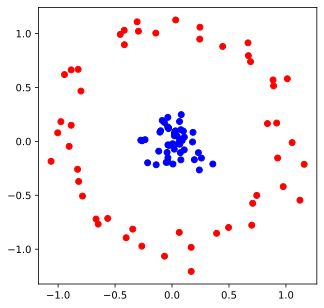

In [9]:
X_non_linear, y_non_linear = datasets.make_circles(100, factor=.1, noise=.1)

_, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, cmap=cmap)
plt.show()

### Default model

Below you can see what happens if we naively train a linear `SVC` model on this non-linear dataset.

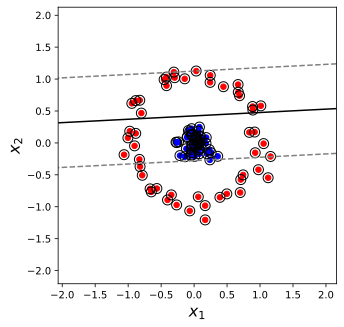

In [10]:
clf = svm.SVC(kernel='linear').fit(X_non_linear, y_non_linear)

_, ax = plt.subplots(figsize=(5, 5))
plot_svc_decision_function(clf, X_non_linear, y_non_linear, ax)
plt.show()

In [11]:
print(classification_report(y_true=y_non_linear, y_pred=clf.predict(X_non_linear), digits=3))

              precision    recall  f1-score   support

           0      1.000     0.400     0.571        50
           1      0.625     1.000     0.769        50

    accuracy                          0.700       100
   macro avg      0.812     0.700     0.670       100
weighted avg      0.812     0.700     0.670       100



### Manually Adding a Helper Dimension

It is clear that no linear discrimination will ever be able to separate this data. We can think about how we might project the data into a higher dimension such that a linear separator would be sufficient. In the code below we compute a new value `r` based on the data points. Adding `r` as a new dimension to our data, we will see that the data becomes linearly separable.

We compute $r = e^{-||x||^2}$. We chose this because the data points lie on circles and $||x||^{2}$ corresponds to the radius of the circle that a data point lies on. The exponential is often used for numerical stability. However in this case, the picture would look the same when plotting $-||x||^{2}$ directly.

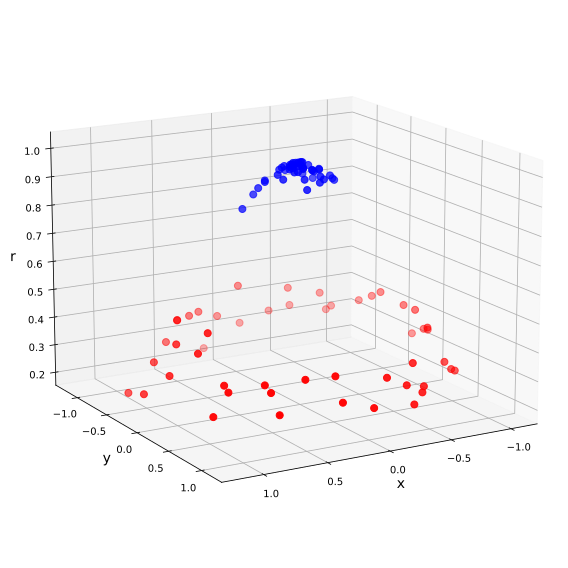

In [12]:
r = np.exp(-(X_non_linear ** 2).sum(1))

fig1=plt.figure(figsize=(10, 10))
ax = fig1.add_subplot(projection='3d')
ax.scatter3D(X_non_linear[:, 0], X_non_linear[:, 1], r,
             c=y_non_linear, s=50, cmap=cmap)
ax.view_init(elev=15, azim=60)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

plt.show()

### 2A Linear Classification in the extended feature space

Task: Append the additional feature `r` to the original data `X_non_linear` and train a linear `SVC` in the extended feature space.

In [13]:
X_3d = ...
clf_3d = svm.SVC(kernel='linear').fit(...)

TypeError: BaseLibSVM.fit() missing 1 required positional argument: 'y'

Have the accuracy metrics improved?

In [14]:
print(classification_report(y_true=y_non_linear, y_pred=clf_3d.predict(X_3d), digits=3))

NameError: name 'clf_3d' is not defined

We can now visualise the learned decision boundary in the extended feature space together with the transformed data:

In [15]:
# get the parameters from the optimised model that specify the decision boundary
w = clf_3d.coef_[0]

b=clf_3d.intercept_[0]

fig1=plt.figure(figsize=(10, 10))
ax = fig1.add_subplot(projection='3d')
ax.scatter3D(X_non_linear[:, 0], X_non_linear[:, 1], r,
             c=y_non_linear, s=50, cmap=cmap)
ax.view_init(elev=15, azim=60)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

# Surface plot of the decision boundary (a plane) from the
# optimised parameters
xx, yy = np.meshgrid(np.linspace(-1,1,2),np.linspace(-1,1,2))
# 0=b+w_0*x+w_1*y+w_2*z  ->  rearrange for z
z = -(b + w[0]*xx * w[1]*yy) / w[2]
ax.plot_surface(xx, yy, z, alpha=0.5)

plt.show()

NameError: name 'clf_3d' is not defined


Report for **task 2A** the accuracy achieved with the linear SVM in the extended feature space.

### 2B The Kernel Trick
**Note** that in this case it was relatively straight forward to find a suitable new dimension `r` which allows to separate the data linearly. However, this is not feasible for real world datasets. We will now use the RBF kernel on the unchanged data to let the SVM find a proper projection by itself.
To use the kernel trick, we need to set a non-linear `kernel`.

Use `kernel='rbf'` and fit an `SVC` model on `X_non_linear` and `y_non_linear`.

TypeError: Ellipsis is not an estimator instance.

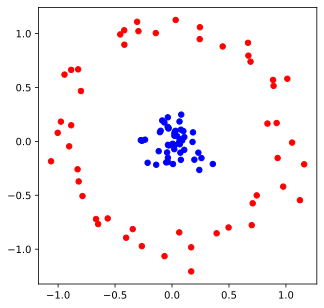

In [16]:
from sklearn.svm import SVC

# create an SVC an set its kernel parameter to 'rbf'
# train / fit it on X_non_linear and y_non_linear
clf = ...

_, ax = plt.subplots(figsize=(5, 5))
plot_svc_decision_function(clf, X_non_linear, y_non_linear, ax)
plt.show()

In [17]:
print(classification_report(y_true=y_non_linear, y_pred=clf.predict(X_non_linear), digits=3))

AttributeError: 'ellipsis' object has no attribute 'predict'


What is the accuracy achieved with the SVM with rbf-kernel?